In [2]:
!pip install statsmodels

  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/d5/7e/61ec96b208af273126a211a9aa1c9dfefb216725192973fc52a858ac9219/statsmodels-0.14.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for patsy>=0.5.6 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 163.8 kB/s eta 0:01:00
   -------------

In [1]:
# from sklearnex import patch_sklearn
# patch_sklearn()
import pandas as pd
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 624031-XLS-ENG.xlsx to 624031-XLS-ENG.xlsx


In [3]:
# file_path = 'ML_Projects/624031-XLS-ENG.xlsx'

file_path = '/content/624031-XLS-ENG.xlsx'
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names
sheet_names

['Product_and_data_disclaimer', 'Synthetic_farm_data']

In [4]:
farm_data = pd.read_excel(file_path, sheet_name='Synthetic_farm_data')
farm_data.head()

Feed_inefficiency  Protein_efficiency  Animal_mortality  Fertilizer_use  \
0              0.765              35.200             2.562          55.105   
1              0.709              37.567             3.632         113.857   
2              0.846              37.200             1.782          82.786   
3              0.720              33.753             1.720         192.435   
4              0.898              37.470             0.000         163.447   

   Land_use  Soy_use  Permanent_grassland  Grazing  Manure_biogas  \
0     2.475    0.400             0.570483   54.083              0   
1     1.058    0.451             0.668630   14.384              1   
2     0.836    0.577             0.532329   49.159              1   
3     0.887    0.415             0.886300   25.905              1   
4     0.721    4.617             0.604052   60.016              0   

   Renewable_electricity_use  Carbon_footprint  
0                          1          0.825022  
1                          1          0.744218  
2                          0          0.745613  
3                          1          0.789374  
4                          1          0.805266

# Descriptive Analysis

In [5]:
descriptive_stats = farm_data.describe()
descriptive_stats

Feed_inefficiency  Protein_efficiency  Animal_mortality  \
count       10000.000000        10000.000000      10000.000000   
mean            1.006704           29.053928          4.973184   
std             0.169530            4.112698          3.041632   
min             0.700000           17.715000          0.000000   
25%             0.880000           26.109500          2.629000   
50%             0.989000           28.998000          4.328000   
75%             1.115000           32.003000          6.691500   
max             1.605000           38.491000         15.499000   

       Fertilizer_use      Land_use       Soy_use  Permanent_grassland  \
count    10000.000000  10000.000000  10000.000000         10000.000000   
mean       217.244996      1.414194     11.084532             0.884685   
std         88.883358      0.557979     16.462772             0.560567   
min         44.801000      0.610000      0.000000             0.100279   
25%        150.711750      0.980000      0.726750             0.433611   
50%        206.208000      1.313000      3.431500             0.772193   
75%        273.718750      1.739000     14.350500             1.234888   
max        489.690000      3.624000     86.388000             3.020298   

            Grazing  Manure_biogas  Renewable_electricity_use  \
count  10000.000000   10000.000000               10000.000000   
mean      20.577083       0.103700                   0.304400   
std       16.906429       0.304886                   0.460176   
min        0.000000       0.000000                   0.000000   
25%        6.945000       0.000000                   0.000000   
50%       15.957000       0.000000                   0.000000   
75%       30.370750       0.000000                   1.000000   
max       72.921000       1.000000                   1.000000   

       Carbon_footprint  
count      10000.000000  
mean           1.128795  
std            0.150066  
min            0.744218  
25%            1.023418  
50%            1.110949  
75%            1.213275  
max            2.075455

# Histogram of Continous Variables

In [6]:
variables = [
    "Feed_inefficiency", "Protein_efficiency", "Animal_mortality",
    "Fertilizer_use", "Land_use", "Soy_use",
    "Permanent_grassland", "Grazing", "Carbon_footprint"
]

for var in variables:
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=farm_data[var], nbinsx=30))
    fig.update_layout(
        title=f'Distribution of {var}',
        xaxis_title=var,
        yaxis_title='Count'
    )
    fig.show()


# Trend Analysis

In [18]:
import plotly.express as px

# Scatter plot for Feed Inefficiency vs. Carbon Footprint with trend line
fig_feed = px.scatter(
    farm_data,
    x='Feed_inefficiency',
    y='Carbon_footprint',
    title='Feed Inefficiency vs. Carbon Footprint',
    labels={'Feed_inefficiency': 'Feed Inefficiency', 'Carbon_footprint': 'Carbon Footprint (CO2e per kg FPCM)'},
    trendline='ols'
)
fig_feed.update_traces(line=dict(color='red'))
fig_feed.show()


In [19]:

# Scatter plot for Fertilizer Use vs. Carbon Footprint with trend line
fig_fertilizer = px.scatter(
    farm_data,
    x='Fertilizer_use',
    y='Carbon_footprint',
    title='Fertilizer Use vs. Carbon Footprint',
    labels={'Fertilizer_use': 'Fertilizer Use (kg/ha)', 'Carbon_footprint': 'Carbon Footprint (CO2e per kg FPCM)'},
    trendline='ols'
)
fig_fertilizer.update_traces(line=dict(color='red'))
fig_fertilizer.show()


In [20]:

# Scatter plot for Grazing vs. Carbon Footprint with trend line
fig_grazing = px.scatter(
    farm_data,
    x='Grazing',
    y='Carbon_footprint',
    title='Grazing vs. Carbon Footprint',
    labels={'Grazing': 'Grazing (%)', 'Carbon_footprint': 'Carbon Footprint (CO2e per kg FPCM)'},
    trendline='ols'
)
fig_grazing.update_traces(line=dict(color='red'))
fig_grazing.show()


In [14]:
# Box plot for Carbon Footprint by Manure Management
fig_manure = px.box(farm_data, x='Manure_biogas', y='Carbon_footprint',
                    title='Carbon Footprint by Manure Management',
                    labels={'Manure_biogas': 'Manure Biogas (1 if used, 0 if not)', 'Carbon_footprint': 'Carbon Footprint (CO2e per kg FPCM)'})
fig_manure.show()


In [21]:
# Box plot for Carbon Footprint by Manure Management
fig_manure = px.box(farm_data, x='Renewable_electricity_use', y='Carbon_footprint',
                    title='Carbon Footprint by Manure Management',
                    labels={'Renewable_electricity_use': 'Renewable_electricity_use(1 if used, 0 if not)', 'Carbon_footprint': 'Carbon Footprint (CO2e per kg FPCM)'})
fig_manure.show()


#Dashboard of Key Insights

In [26]:

# Create a subplot figure with a 3x2 grid (3 rows and 2 columns)
fig = make_subplots(
    rows=3, cols=2,
    subplot_titles=(
        "Feed Inefficiency vs. Carbon Footprint",
        "Fertilizer Use vs. Carbon Footprint",
        "Grazing vs. Carbon Footprint",
        "Correlation Matrix Heatmap",
        "Carbon Footprint by Manure Management",
        "Carbon Footprint by Renewable Electricity Use"
    ),
    column_widths=[0.5, 0.5],
    row_heights=[0.33, 0.33, 0.33],
    shared_yaxes=False,
)

# Scatter plot for Feed Inefficiency vs. Carbon Footprint with trend line
fig_feed = px.scatter(
    farm_data,
    x='Feed_inefficiency',
    y='Carbon_footprint',
    trendline='ols'
)
fig_feed.update_traces(line=dict(color='red'))
for trace in fig_feed.data:
    fig.add_trace(trace, row=1, col=1)

# Scatter plot for Fertilizer Use vs. Carbon Footprint with trend line
fig_fertilizer = px.scatter(
    farm_data,
    x='Fertilizer_use',
    y='Carbon_footprint',
    trendline='ols'
)
fig_fertilizer.update_traces(line=dict(color='red'))
for trace in fig_fertilizer.data:
    fig.add_trace(trace, row=1, col=2)

# Scatter plot for Grazing vs. Carbon Footprint with trend line
fig_grazing = px.scatter(
    farm_data,
    x='Grazing',
    y='Carbon_footprint',
    trendline='ols'
)
fig_grazing.update_traces(line=dict(color='red'))
for trace in fig_grazing.data:
    fig.add_trace(trace, row=2, col=1)

# Correlation heatmap with adjusted y-axis labels
correlation_matrix = farm_data.corr()
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis',
    text=correlation_matrix.values,
    texttemplate="%{text:.2f}",
    ygap=10  # Adjust ygap for better spacing between labels
)
fig.add_trace(heatmap, row=2, col=2)

# Box plot for Carbon Footprint by Manure Management
fig_manure = px.box(
    farm_data,
    x='Manure_biogas',
    y='Carbon_footprint'
)
for trace in fig_manure.data:
    fig.add_trace(trace, row=3, col=1)

# Box plot for Carbon Footprint by Renewable Electricity Use
fig_renewable = px.box(
    farm_data,
    x='Renewable_electricity_use',
    y='Carbon_footprint'
)
for trace in fig_renewable.data:
    fig.add_trace(trace, row=3, col=2)

fig.update_layout(
    title_text='Dashboard of Key Insights',
    height=1200,
    showlegend=False,
    yaxis4=dict(tickangle=-45)  # Adjust y-axis labels angle for better spacing
)

fig.show()


# Correlation Analysis

In [7]:
correlation_matrix = farm_data.corr()
fig = go.Figure(
    data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.columns,
        colorscale='Viridis',
        text=correlation_matrix.values,
        texttemplate="%{text:.2f}"
    )
)

fig.update_layout(
    title='Correlation Matrix Heatmap with Data Labels',
    xaxis_nticks=36
)

fig.show()

#Visualisations

# Regression Analysis

In [8]:
y = farm_data['Carbon_footprint']

# Define the independent variables (all other variables excluding 'Carbon_footprint')
X = farm_data.drop(columns=['Carbon_footprint'])

# Add a constant to the independent variables matrix (for the intercept term in the regression)
X = sm.add_constant(X)

# Perform the regression analysis
model = sm.OLS(y, X).fit()
regression_summary = model.summary()
regression_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Carbon_footprint   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     9570.
Date:                Sat, 31 Aug 2024   Prob (F-statistic):               0.00
Time:                        09:35:49   Log-Likelihood:                 16573.
No. Observations:               10000   AIC:                        -3.312e+04
Df Residuals:                    9989   BIC:                        -3.305e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.4635      0.007     63.753      0.000       0.449       0.478
Feed_inefficiency             0.3466      0.003    104.405      0.000       0.340       0.353
Protein_efficiency           -0.0057      0.000    -39.720      0.000      -0.006      -0.005
Animal_mortality              0.0041      0.000     26.564      0.000       0.004       0.004
Fertilizer_use                0.0010   5.97e-06    163.395      0.000       0.001       0.001
Land_use                      0.1849      0.001    191.661      0.000       0.183       0.187
Soy_use                       0.0020   2.86e-05     69.033      0.000       0.002       0.002
Permanent_grassland           0.0008      0.001      0.991      0.322      -0.001       0.002
Grazing                      -0.0008   3.06e-05    -27.138      0.000      -0.001      -0.001
Manure_biogas                -0.0525      0.002    -34.210      0.000      -0.055      -0.049
Renewable_electricity_use    -0.0420      0.001    -39.423      0.000      -0.044      -0.040
==============================================================================
Omnibus:                     1346.085   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17113.416
Skew:                          -0.123   Prob(JB):                         0.00
Kurtosis:                       9.404   Cond. No.                     3.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Multicollinearity
 Given the high condition number (3.96e+03), it would be useful to check for multicollinearity among predictors.

In [9]:
# Calculate Variance Inflation Factor (VIF) for each feature
X_no_constant = X.drop(columns=['const'])
vif_data = pd.DataFrame()
vif_data['Feature'] = X_no_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_no_constant.values, i) for i in range(X_no_constant.shape[1])]

vif_data


Feature        VIF
0          Feed_inefficiency  25.036568
1         Protein_efficiency  20.698112
2           Animal_mortality   3.741823
3             Fertilizer_use   7.883793
4                   Land_use   9.272336
5                    Soy_use   1.506364
6        Permanent_grassland   3.451353
7                    Grazing   3.010272
8              Manure_biogas   1.142944
9  Renewable_electricity_use   1.606086

#Applying Ridge Regression

To address multicollinearity, we can first try removing or combining variables with high multicollinearity, like Feed_inefficiency and Protein_efficiency. Alternatively, applying regularization techniques such as Ridge or Lasso regression can help manage multicollinearity without removing variables.

Let's proceed by applying Ridge regression, which can reduce multicollinearity's impact by adding a penalty to the regression coefficients:

In [10]:
np.random.seed(42)
X = farm_data.drop(columns=['Carbon_footprint'])
y = farm_data['Carbon_footprint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for regularization techniques and some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Extra Trees Regressor": ExtraTreesRegressor(random_state=42)
}

results = []
for model_name, model in models.items():
    # For linear and ridge regression, use standardized data
    if model_name in ["Linear Regression", "Ridge Regression"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append({
        "Model": model_name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae
    })

results_df = pd.DataFrame(results)
print(results_df)


                         Model        R2      RMSE       MAE
0            Linear Regression  0.904132  0.046049  0.032164
1             Ridge Regression  0.904139  0.046047  0.032160
2      Decision Tree Regressor  0.871032  0.053410  0.040480
3      Random Forest Regressor  0.954877  0.031592  0.023099
4  Gradient Boosting Regressor  0.973842  0.024054  0.016998
5        Extra Trees Regressor  0.973579  0.024175  0.016876


In [11]:
import plotly.express as px

# Assuming results_df is already defined as per your data

fig_r2 = px.bar(results_df, x='Model', y='R2', title='Model Performance: R² Score',
                labels={'R2': 'R² Score'}, color='R2')
fig_r2.show()
fig_rmse = px.bar(results_df, x='Model', y='RMSE', title='Model Performance: RMSE',
                  labels={'RMSE': 'RMSE'}, color='RMSE')
fig_rmse.show()
fig_mae = px.bar(results_df, x='Model', y='MAE', title='Model Performance: MAE',
                 labels={'MAE': 'Mean Absolute Error (MAE)'}, color='MAE')
fig_mae.show()

#Hyperparameter tuning Gradient Boosting Regressor

In [22]:
X = farm_data.drop(columns=['Carbon_footprint'])
y = farm_data['Carbon_footprint']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gbr = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)
best_gbr = grid_search.best_estimator_
y_pred = best_gbr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# Print the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"R2 Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
R2 Score: 0.9897
RMSE: 0.0151
MAE: 0.0108


## Feature Importance

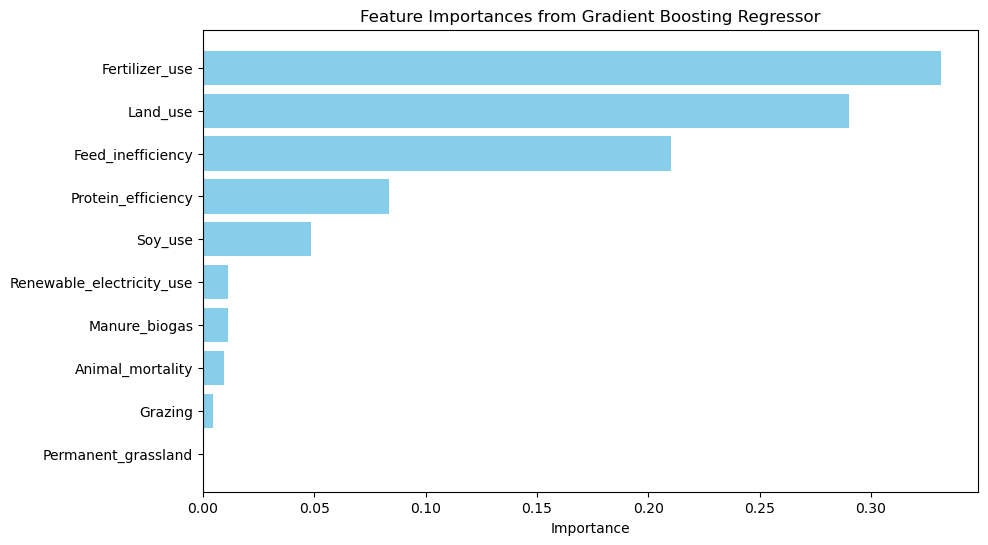

In [25]:
import matplotlib.pyplot as plt

feature_importances = best_gbr.feature_importances_
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, median_absolute_error

# Predictions using the best Gradient Boosting Regressor model
y_pred = best_gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")
print(f"Median Absolute Error (MedAE): {medae:.4f}")

Mean Squared Error (MSE): 0.0002
Mean Absolute Percentage Error (MAPE): 0.0093
Median Absolute Error (MedAE): 0.0082


## SHAP (SHapley Additive exPlanations)
SHAP values provide a way to explain individual predictions by quantifying the contribution of each feature to the prediction. This method can help in understanding model decisions at a local level.

In [28]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/82/29/923869e92c74bf07ec2b9a52ad5ac67d4184c873ba33ada7d4584356463a/shap-0.46.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/79/89/2d924ca60dbf949f18a6fec223a2445f5f428d9a5f97a6b29c2122319015/numba-0.60.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packages/96/43/dae06432d0c4b1dc9e9149ad37b4ca8384cf6eb7700cd9215b177b914f0a/cloudpickle-3.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for llvmlite<0.44,>=0.43.0dev0 from https://files.pythonhosted.org/packages/20/ab/ed5ed3688c6ba4f0b8d789da19fd8e30a9cf7fc5852effe311bc5aefe73e/llv

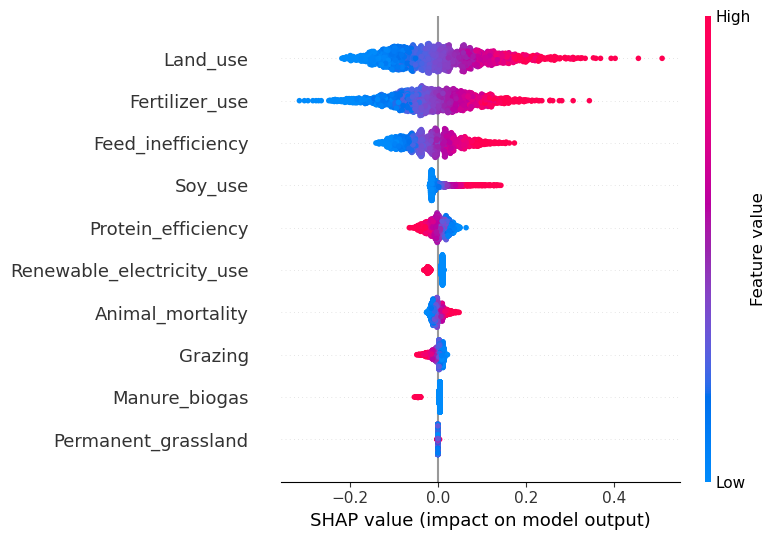

In [29]:
import shap

# SHAP explainer
explainer = shap.Explainer(best_gbr, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)